In [2]:
# This cell is used for creating a button that hides/unhides code cells to quickly look only the results.
# Works only with Jupyter Notebooks.

import os
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
# Description:
#   Exercise7 notebook.
#
# Copyright (C) 2018 Santiago Cortes, Juha Ylioinas
#
# This software is distributed under the GNU General Public 
# Licence (version 2 or later); please refer to the file 
# Licence.txt, included with the software, for details.

# Preparations
import numpy as np

# Select data directory
if os.path.isdir('/coursedata'):
    # JupyterHub
    course_data_dir = '/coursedata'
elif os.path.isdir('../../../coursedata'):
    # Local installation
    course_data_dir = '../../../coursedata'
else:
    # Docker
    course_data_dir = '/home/jovyan/work/coursedata/'

print('The data directory is %s' % course_data_dir)
data_dir = os.path.join(course_data_dir, 'exercise-07-data')
print('Data stored in %s' % data_dir)

The data directory is /coursedata
Data stored in /coursedata/exercise-07-data


# CS-E4850 Computer Vision Exercise Round 7
The problems should be solved before the exercise session and solutions returned via
MyCourses. <br><br> For this exercise round, upload this notebook(pdf and .ipynb versions) containing your source codes (for Exercise 1) and your answer to the question of Exercise2, and all the answers to the questions of Exercise 3 (VGG practical), see part[1-3].ipynb. Note that it's not necessary to upload part1.ipynb, part2.ipynb or part3.ipynb, because all of the necessary questions related to them are contained in this notebook and you're not expected to do any coding in Exercises 2 and 3.

## Exercise 1 - Comparing  bags-of-words  with  tf-idf  weighting
Assume  that  we  have  an  indexed  collection  of  documents  containing  the  five  terms  of the following table where the second row indicates the percentage of documents in which each term appears.<br>

| term | cat | dog |mammals | mouse | pet |
| --- | :---: | :---: | :---: | :---: | :---: |
| **% of documents** | 5 | 20 | 2 | 10 | 60 |

Now, given the query $Q=\{mouse, cat, pet, mammals\}$, compute the similarity between $Q$ and the following example documents $D1$, $D2$, $D3$, by using the cosine similarity measure and tf-idf weights (i.e. term frequency - inverse document frequency) for the bag-of-words histogram representations of the documents and the query.

-  $D1$ = Cat is a pet, dog is a pet, and mouse may be a pet too.
-  $D2$ = Cat, dog and mouse are all mammals.
-  $D3$ = Cat and dog get along well, but cat may eat a mouse.

Ignore other words except the five terms. You may proceed with the following steps:

a) Compute and report the inverse document frequency (idf) for each of the five terms. Use the logarithm with base 2. (idf is the logarithm on slide 69 of Lecture 6.)<br>
b) Compute the term frequencies for the query and each document. <br>
c) Form the tf-idf weighted word occurrence histograms for the query and documents. <br>
d) Evaluate the cosine similarity between the query and each document (i.e.\ normalized scalar product between the weighted occurrence histograms as shown on slide 45).<br> 
e) Report the relative ranking of the documents. (You should get similarities 0.95, 0.64, and 0.63, but you need to determine which corresponds to which document.)<br>

Part (a)

Formula of inverse document frequency
$$\text{idf} = \log_2 \frac{N}{n_i} = \log \frac{\text{Total number of documents in the database}}{\text{Number of documents word i occurs in, in whole database}}$$

In [39]:
percentageTerms = {'cat': 0.05, 'dog': 0.2, 'mammals': 0.02, 'mouse': 0.1, 'pet': 0.6 }

idf = {}

for word in percentageTerms:
    idf[word] = np.log2(1/percentageTerms[word])

for word in idf:
    print(f"The idf of {word} is {idf[word]}")

The idf of cat is 4.321928094887363
The idf of dog is 2.321928094887362
The idf of mammals is 5.643856189774724
The idf of mouse is 3.321928094887362
The idf of pet is 0.7369655941662062


Part (b)

Formula of the term frequency

$$\text{tf} = \frac{n_{id}}{n_{d}} = \frac{\text{Number of occurrences of word i in document d}}{\text{Number of words in
document d}} $$

In [40]:
words = ["cat","dog","mammals","mouse","pet"]

Q = "mouse cat pet mammals"
D1 = "cat is a pet dog is a pet and mouse may be a pet too"
D2 = "cat dog and mouse are all mammals"
D3 = "cat and dog get along well but cat may eat a mouse"


def count(word, tokens):
    counter = 0
    for token in tokens:
        if word == token:
            counter += 1
    return counter

def tf(words, document):
    tokens = document.split(" ")
    filteredDocument = []
    for token in tokens:
        if token in words:
            filteredDocument.append(token)
    nd = len(filteredDocument)
    tf = {}
    for word in words:
        nid = count(word, filteredDocument)
        tf[word] = nid/nd
    return tf

documents = [Q, D1, D2, D3]
documentsString = ["Q","D1","D2","D3"]
tfDocuments = {}
for i in range(0, len(documents)):
    print(f"The term frequency for {documentsString[i]} is")
    print(tf(words, documents[i]))
    tfDocuments[documentsString[i]] = tf(words, documents[i])
    print()

The term frequency for Q is
{'cat': 0.25, 'dog': 0.0, 'mammals': 0.25, 'mouse': 0.25, 'pet': 0.25}

The term frequency for D1 is
{'cat': 0.16666666666666666, 'dog': 0.16666666666666666, 'mammals': 0.0, 'mouse': 0.16666666666666666, 'pet': 0.5}

The term frequency for D2 is
{'cat': 0.25, 'dog': 0.25, 'mammals': 0.25, 'mouse': 0.25, 'pet': 0.0}

The term frequency for D3 is
{'cat': 0.5, 'dog': 0.25, 'mammals': 0.0, 'mouse': 0.25, 'pet': 0.0}



Part (c)

Formula of the term frequency – inverse document frequency 

$$t_i = \frac{n_{id}}{n_d} \log_2 \frac{N}{n_i} = \text{tf} \times \text{idf} $$

The tf-idf for document Q is
{'cat': 1.0804820237218407, 'dog': 0.0, 'mammals': 1.410964047443681, 'mouse': 0.8304820237218405, 'pet': 0.18424139854155155}

The tf-idf for document D1 is
{'cat': 0.7203213491478937, 'dog': 0.3869880158145603, 'mammals': 0.0, 'mouse': 0.553654682481227, 'pet': 0.3684827970831031}

The tf-idf for document D2 is
{'cat': 1.0804820237218407, 'dog': 0.5804820237218405, 'mammals': 1.410964047443681, 'mouse': 0.8304820237218405, 'pet': 0.0}

The tf-idf for document D3 is
{'cat': 2.1609640474436813, 'dog': 0.5804820237218405, 'mammals': 0.0, 'mouse': 0.8304820237218405, 'pet': 0.0}



Text(0.5, 1.0, 'tfidf of D3')

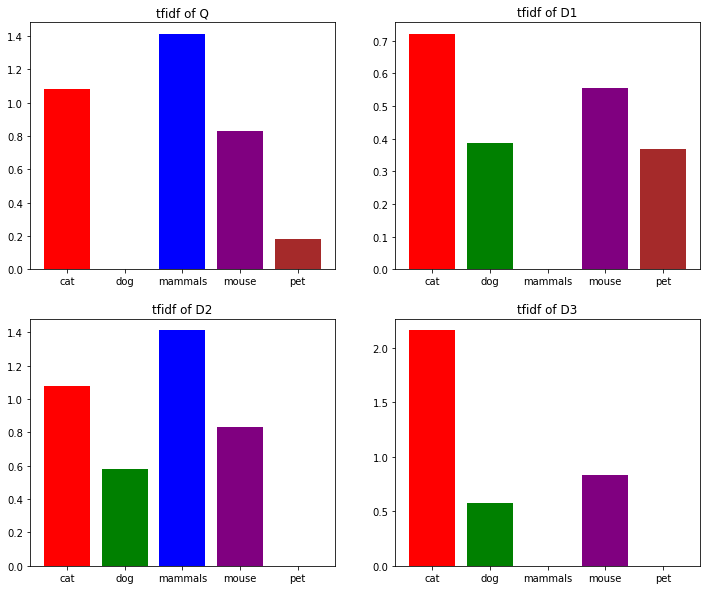

In [41]:
# tf-idf = tf * idf
documentsString = ["Q","D1","D2","D3"]
words = ["cat","dog","mammals","mouse","pet"] 

def tfidf(tf, idf):
    tfidf = {}
    for word in tf:
        tfidf[word] = tf[word] * idf[word]
    return tfidf

tfidfDocuments = {}

for document in documentsString:
    tfidfDocuments[document] = tfidf(tfDocuments[document], idf) 
    print(f"The tf-idf for document {document} is" )
    print(tfidfDocuments[document])
    print()

fig, axes = plt.subplots(figsize=(12,10), ncols=2, nrows=2)


colors=['red', 'green', 'blue', 'purple', 'brown']

for i in range(4):
    length = len(words)

axes[0][0].bar(range(length), list(tfidfDocuments["Q"].values()), tick_label = words, color = colors)
axes[0][0].set_title("tfidf of Q")

axes[0][1].bar(range(length), list(tfidfDocuments["D1"].values()), tick_label = words, color = colors)
axes[0][1].set_title("tfidf of D1")

axes[1][0].bar(range(length), list(tfidfDocuments["D2"].values()), tick_label = words, color = colors)
axes[1][0].set_title("tfidf of D2")

axes[1][1].bar(range(length), list(tfidfDocuments["D3"].values()), tick_label = words, color = colors)
axes[1][1].set_title("tfidf of D3")

Part (d) 

Formula of cosine similarity

$$ \text{cosine\_similarity}(d_j, q) = \frac{\langle d_j, q\rangle}{\lVert{d_j}\rVert \lVert{q}\rVert} $$

In [42]:
from math import *

def cosine_similarity(query, document):
    numerator = sum([document[word] * query[word] for word in query])
    denominator = sqrt(sum([value ** 2 for value in document.values()])) * sqrt(sum([value ** 2 for value in query.values()]))
    similarity = numerator/denominator

print("Cosine similarity between Query and Document 1")
print(sim(tfidfDocuments['Q'], tfidfDocuments['D1']))

print("Cosine similarity between Query and Document 2")
print(sim(tfidfDocuments['Q'], tfidfDocuments['D2']))

print("Cosine similarity between Query and Document 3")
print(sim(tfidfDocuments['Q'], tfidfDocuments['D3']))

Cosine similarity between Query and Document 1
0.6288846426378089
Cosine similarity between Query and Document 2
0.9546948111493487
Cosine similarity between Query and Document 3
0.6431937393302419


Part (e) Report the relative ranking of the documents. 

Rank 1: Document 2 of similarity 0.9546

Rank 2: Document 3 of similarity 0.6431 

Rank 3: Document 1 of similarity 0.6288

## Exercise 2 - Precision  and  recall
There is a database of 10000 images and a user, who is only interested in images which contain a car. It is known that there are 500 such images in the database. An  automatic image retrieval system retrieves 300 car images and 50 other images from the database. Determine and report the precision and recall of the retrieval  system in this particular case.

Type your answer here:

We have:

True positive = 300 car images truly returned by the retrieval system

False positive = 50 other images wrongly returned by the retrieval system

False negative = 500 - 300 = 200 rest car images that are not returned by the retrieval system

True negative is not relevant in this exercise

The precision and recall of this retrieval system is:

$$ Precision = \frac{TP}{TP + FP} = \frac{300}{300 + 50} = 0.857 $$

$$ Recall = \frac{TP}{TP + FN} = \frac{300}{300 + 200} = 0.6 $$

## Exercise 3 - VGG practical on object instance recognition
See the questions in part[1-3].ipynb and write your answers here.

Part1:
Stage I.A (two questions)
Stage I.B (two questions)
Stage I.C (one question)

Part2 (one question)

Part3:
Stage III.A (three questions)
Stage III.B (one question)
Stage III.C (two questions)

Type your answers here: 

## Part 1: Stage I.A

##### Question 1: Note the change in density of detections across the image. Why does it change? Will it be a problem for matching? How could it be avoided?

The change in density of detections across the image varies because in the second image, there is a shaded part in the left corner of the cathedral, while the original image is uniformly lighted. 

The SIFT methods helps locate the local features in an image, commonly known as the 'keypoints' of the image. Different lighting still does not change these keypoints, such as edges and corners of the cathedrals. In this case I believe the shade has negligible effect on matching 

This problem may be avoided if the underlying neighbour finding algorithm, which is the k-d tree method, is replaced with the best bin first search algorithm, which can discover the nearest neighbors with fewer number of calculations.

##### Question 2: Occasionally, a feature is detected multiple times, with different orientations. This may happen when the orientation assignment is ambiguous. Which kind of image structure would result in ambiguous orientation assignment?

A feature is detected multiple times with different orientations when the keypoint appearance is symmetric, so determining the orientation can be ambiguous. The image structure that would result in ambiguous orientation assignment may have nonplanar structure, because from 2D projected image, its hard to determine the real 3D point as the depth Z is lost in the projection process. In SIFT feature detector, it may return multiple possible results when many orientations are equally plausible

## Part 1: Stage I.B

##### Question 1: Note the descriptors are computed over a much larger region (shown in blue) than the detection (shown in green). Why?

The descriptor usually requires a larger region to describe a feature, because the neighboring region of the features need to be taken into account. Therefore, the discriptors are computed over a much larger region than the detection.

##### Question 2: Notice that there are many mismatches. Examine some of the mismatches to understand why the mistakes are being made. For example, is the change in lighting a problem? What additional constraints can be applied to remove the mismatches?

There are in total 4 features. Because of the high dimensionality, the matchings are more prone to errors. SIFT is generally invariant to different lighting, noise and rotation. So I believe change in lighting is not a problem. Possible addition constraints can be perpendicular direction of the current orientation. Sharing two different orientations may increase the matching accuracy


## Part 1: Stage I.C

##### Question 1: Examine some of the remaining mismatches to understand why they have occurred. How could they be removed?

Because the Lowe algorithm rejects matches whose distance ratio between first and second neighbor is greater than 0.8, which helps in eliminating almost all false matches. However, this is not completely exhaustive. To be robust against feature outliers, the RANSAC algorithm can be applied to improve the matching accuracy

###############################################################

## Part 2

##### Question 1: The transformation between the images induced by the plane is a planar homography. The detections are only affine co-variant (not as general as a planar homography). So how can descriptors computed on these detections possibly match?

Descriptors computed on these detections can possible match because the descripted region is an ellipse shape, which at least can help detect matchings even in planar homography that is not affine co-variant

###############################################################

## Part 3: Stage III.A

##### Question 1: The size of the vocabulary (the number of clusters) is an important parameter in visual word algorithms. How does the size affect the number of inliers and the difficulty of computing the transformation?

1. When original maxNumChecks=1014, Matches on quantized descriptors: 46 matches in 0.0241s Verified matches on quantized descriptors: 10 matches 
With varying value of maxNumChecks variables, the returned matches by the descriptors do not change significantly and the number of inliers slightly reduced. Therefore, the size of the outliers does not greatly affect the difficulty of computing the transformation.

##### Question 2: In the above procedure the time required to convert the descriptors into visual words was not accounted for. Why?

2. It is because the quantization of the descriptors has already been calculated, so it shouldn't be accounted for

##### Question 3: What is the speedup in searching a large, fixed database of 10, 100, 1000 images? 

3. The speed up time is the logarithm base (10). Speed up of 10 images is twice faster than 100 images and 3 times faster than 1000 images



## Part 3: Stage III.B

##### Question 1: Task: How many erroneously matched images do you count in the top results? Why does the top image have a score of 1 (0.9698... see the NOTE above)?

There are in total 25 erroneous matched images in the top results. The top image has a score of 1 because it is the same as the queried image => Near perfect score



## Part 3: Stage III.C 

##### Question 1: Why is the top score much larger than 1 now?

Because in this situation, the score is actually the number of inlier words, so it is more than 1 

##### Question 2: Are the retrieval results improved after geometric verification?

Because unrelated images generally have lower scores, the retrieval results are actually improved after geometric verification.